In [17]:
# Importing libs
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1 : Importing and Visualizing Dataset

In [18]:
df = pd.read_csv("winequality-red.csv", sep=";")

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [19]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [20]:
x = df[df.columns[:-1]].values
y = df["quality"].values

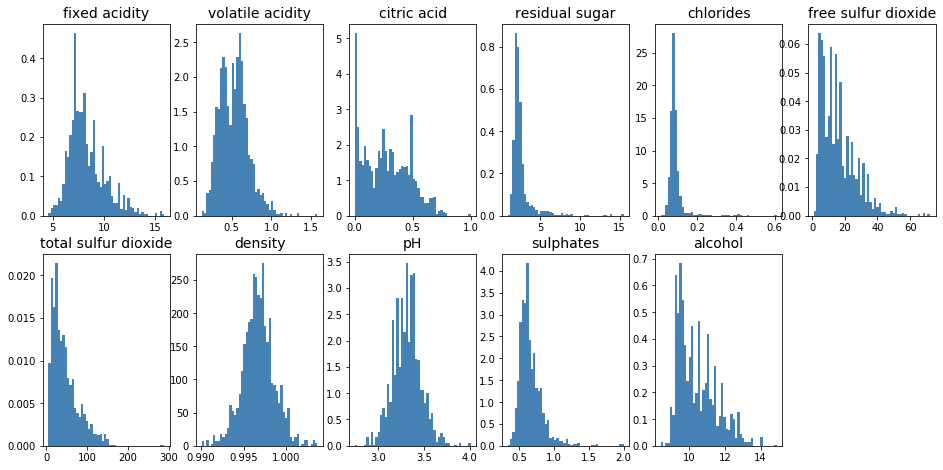

In [21]:
fig = plt.figure(figsize=(16,12))

for feature_i in range(x.shape[1]):
    x_axis = fig.add_subplot(3,6, (feature_i+1))
    h_axis = x_axis.hist(x[:, feature_i], bins=50, color="steelblue", density=True, edgecolor="none")
    x_axis.set_title(df.columns[feature_i], fontsize=14)

In [22]:
# labels noramlized : wine quality under should be classified as bad (value = 0)  
#y_class = np.where(y<6,0,1)
y_class = y


In [23]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y_class,test_size=0.3)

_normalizing dataset_

In [24]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)


# Step 2 : Selecting/Training Models  w/ Cross validation


Selecting 2 models optimizing respectively MSE and R2

In [29]:
from sklearn import neighbors, model_selection
# hyperparameters to set
param_grid = {"n_neighbors": [3,4,5,7,9,10,11,13,15, 17, 19]}

clf_mse = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),
    param_grid, # hyperparameters to test
    cv=5, # folds for cross validation (5 or 10 generally)
    scoring='neg_mean_squared_error', # score to optimize, here it is the mean scored error
)

clf_r = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),
    param_grid, # hyperparameters to test
    cv=5, # folds for cross validation (5 or 10 generally)
    scoring='max_error', # score to optimize, here it is the mean scored error
)

In [30]:
clf_r.fit(x_train_std, y_train)
clf_mse.fit(x_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 7, 9, 10, 11, 13, 15, 17,
                                         19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

# Step 3 : Analyse  perfomances of both models

## Best Hyper parameters on training 

_Best Hyperparameters cross validation for MSE focused model_


In [31]:
clf_mse.best_params_

{'n_neighbors': 19}

_Best Hyperparameters cross validation for MSE focused model_

In [32]:
clf_r.best_params_

{'n_neighbors': 4}

## Data set Accurency performances

In [34]:
y_pred_r = clf_r.predict(x_test_std)
y_pred_mse = clf_r.predict(x_test_std)


_RMSE on Model trained to optimize MSE_

In [35]:
from sklearn import metrics

np.sqrt( metrics.mean_squared_error(y_test, y_pred_mse))

0.7071988463885764

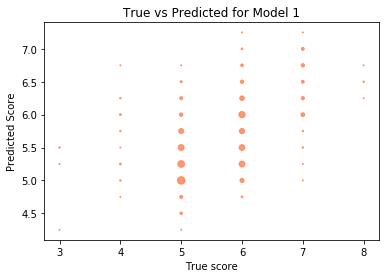

In [36]:
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_pred_mse)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], 
        [k[1] for k in keys],
        s=[sizes[k] for k in keys], 
        color='coral', alpha =0.8)
plt.xlabel("True score")
plt.ylabel("Predicted Score")
plt.title("True vs Predicted for Model 1")
plt.show()

 _RMSE on Model trained to optimize max error_

In [37]:
np.sqrt( metrics.mean_squared_error(y_test, y_pred_r))

0.7071988463885764

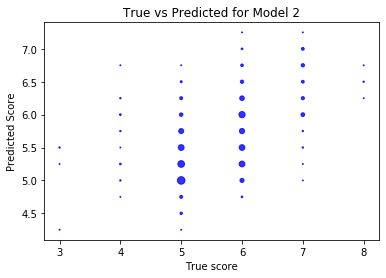

In [38]:
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_pred_r)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], 
        [k[1] for k in keys],
        s=[sizes[k] for k in keys], 
        color='blue', alpha =0.8)
plt.xlabel("True score")
plt.ylabel("Predicted Score")
plt.title("True vs Predicted for Model 2")
plt.show()

## Compare to Naive approches

_RMSE on dummy model on mean_

In [39]:
from sklearn import dummy, metrics
dum = dummy.DummyRegressor(strategy='mean')

dum.fit(x_train_std, y_train)

y_pred_dum = dum.predict(x_test_std)

np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))


0.7988614773562345